## Import  Liberies

In [1]:
#Please install pakages first like wordcloud, re, bs4, 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from bs4 import BeautifulSoup

from sklearn.metrics import DistanceMetric
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import f1_score
from wordcloud import WordCloud, STOPWORDS
from sklearn.manifold import TSNE


import warnings
warnings.filterwarnings('ignore')

# Reading Dataset

In [2]:
df = pd.read_csv("train.csv")

In [3]:
new_df = df.sample(1000,random_state=2)

In [4]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0


# Preprocesssing

In [5]:
# function having question into lowercase and strip whitespace

def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')
    
    # The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]', '')
    
    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    # Decontracting words
    # https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
    # https://stackoverflow.com/a/19794953
    contractions = { 
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")
    
    # Removing HTML tags
    q = BeautifulSoup(q)
    q = q.get_text()
    
    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()

    
    return q
    

In [6]:
preprocess("I've already! wasn't <b>done</b>?")

'i have already  was not done'

In [7]:
new_df['question1']= new_df['question1'].apply(preprocess)
new_df['question2']= new_df['question2'].apply(preprocess)

In [8]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0


# Basic Feature Engineering

In [9]:
# Feature Engineering
# adding two more colunm into the dataframe
new_df['q1_len'] = new_df['question1'].str.len() 
new_df['q2_len'] = new_df['question2'].str.len()

In [10]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49


In [11]:
# adding another two features q1_num_words and q2_num_words
new_df['q1_num_words'] = new_df['question1'].apply(lambda row:len(row.split(" "))) 
new_df['q2_num_words'] = new_df['question2'].apply(lambda row:len(row.split(" "))) 
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9


In [12]:
# lambda function is used for 1st lowercase and then split
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [13]:
new_df['word_common'] = new_df.apply(common_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,8
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,4
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,1
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3


In [14]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [15]:
new_df['word_total'] = new_df.apply(total_words, axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12,26
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,8,24
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,4,38
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,1,34
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3,13


In [16]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,12,26,0.46
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,8,24,0.33
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,4,38,0.11
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,1,34,0.03
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,3,13,0.23


## Advance Feature Engineering

In [17]:
#Advance Feature Engineering
from nltk.corpus import stopwords

def fetch_token_features(row): #token feature
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001
    STOP_WORDS = stopwords.words("english")
    token_features = [0.0]*8
    
    # Converting the sentence into tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens)==0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features
    


In [18]:
#extract all values
import nltk
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [19]:
'''Sachin is a good player (token =5)(words=3)(stop words= 2)

cwc_min= ratio of no.of common word/length of small que=(3/9)=
cwc_max'''

'Sachin is a good player (token =5)(words=3)(stop words= 2)\n\ncwc_min= ratio of no.of common word/length of small que=(3/9)=\ncwc_max'

In [20]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,word_total,word_share,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,26,0.46,0.874989,0.874989,0.999980,0.999980,0.923070,0.923070,1,1
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,...,24,0.33,0.666644,0.499988,0.714276,0.624992,0.583328,0.466664,1,1
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,...,38,0.11,0.000000,0.000000,0.428565,0.272725,0.149999,0.115384,0,0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,...,34,0.03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,13,0.23,0.749981,0.599988,0.000000,0.000000,0.599988,0.333330,1,0


In [21]:
import distance
def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token mean Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features
    

In [22]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [23]:
# Fuzzy Features
from fuzzywuzzy import fuzz

def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [24]:
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [25]:
print(new_df.shape)
new_df.head()

(1000, 28)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0.923070,1,1,0,13.0,0.855263,99,99,99,99
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,...,0.466664,1,1,3,13.5,0.224490,69,67,65,74
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,...,0.115384,0,0,6,23.0,0.047619,26,29,34,43
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,...,0.000000,0,0,17,21.5,0.050847,29,41,23,30
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,0.333330,1,0,4,7.0,0.542857,55,70,48,69


# Graphs for Feature Engineering

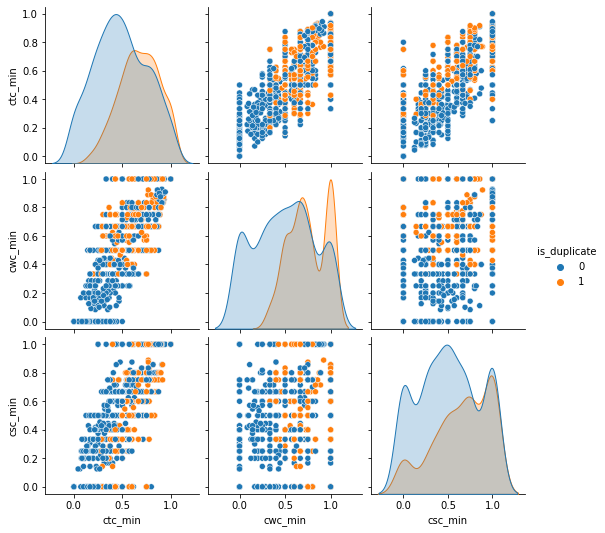

In [26]:
sns.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

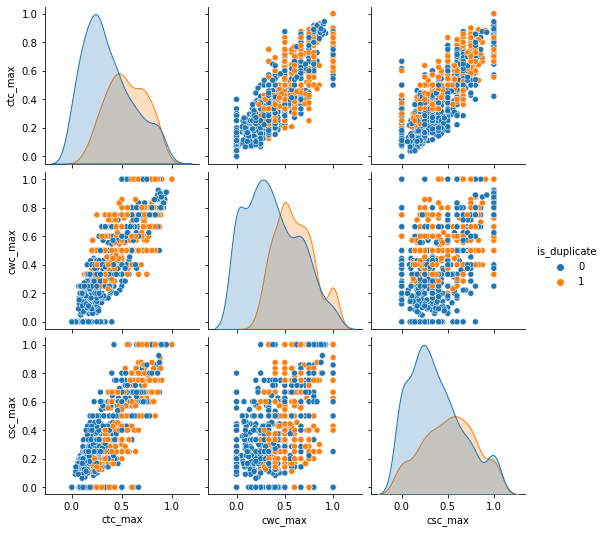

In [27]:
sns.pairplot(new_df[['ctc_max', 'cwc_max', 'csc_max', 'is_duplicate']],hue='is_duplicate')

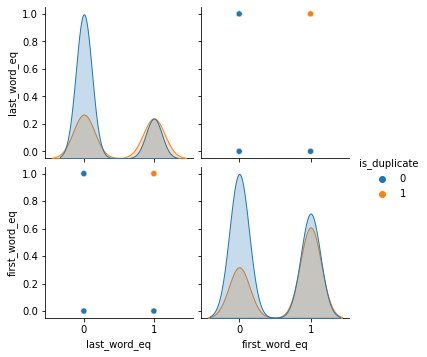

In [28]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

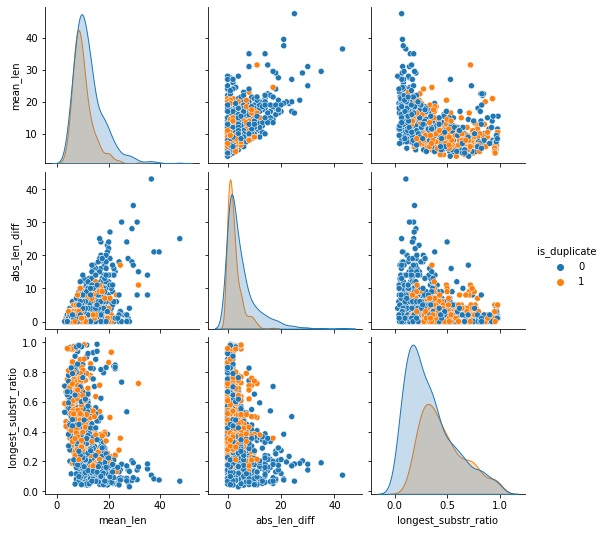

In [29]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

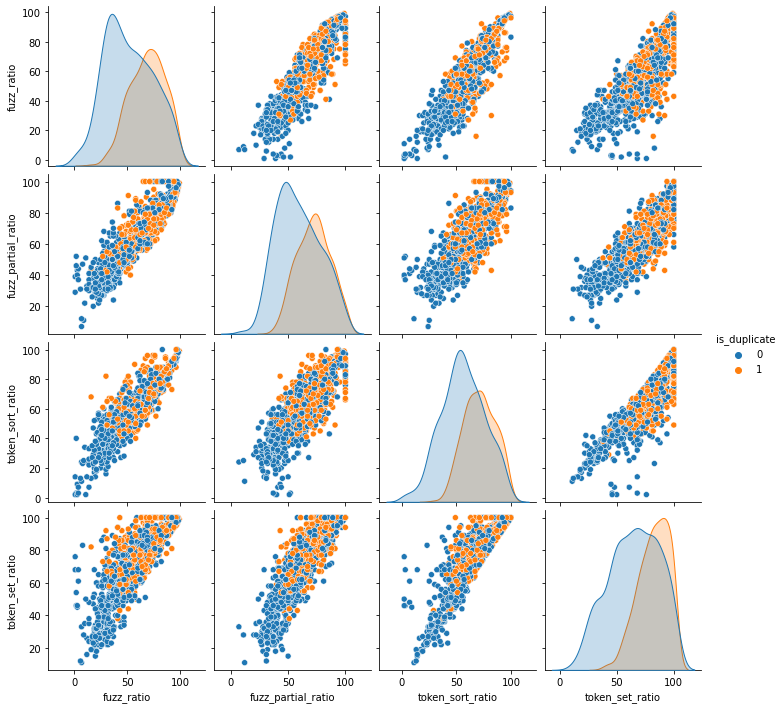

In [30]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio','is_duplicate']],hue='is_duplicate')

In [31]:
# Using TSNE for Dimentionality reduction for 15 Features(Generated after cleaning the data) to 3 dimention

from sklearn.preprocessing import MinMaxScaler

X = MinMaxScaler().fit_transform(new_df[['cwc_min', 'cwc_max', 'csc_min', 'csc_max' , 'ctc_min' , 'ctc_max' , 'last_word_eq', 'first_word_eq' , 'abs_len_diff' , 'mean_len' , 'token_set_ratio' , 'token_sort_ratio' ,  'fuzz_ratio' , 'fuzz_partial_ratio' , 'longest_substr_ratio']])
y = new_df['is_duplicate'].values

In [32]:
from sklearn.manifold import TSNE

tsne2d = TSNE(
    n_components=2,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.007s...
[t-SNE] Computed neighbors for 1000 samples in 0.063s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.238164
[t-SNE] Computed conditional probabilities in 0.042s
[t-SNE] Iteration 50: error = 59.9045486, gradient norm = 0.2943807 (50 iterations in 0.525s)
[t-SNE] Iteration 100: error = 56.0072212, gradient norm = 0.2347953 (50 iterations in 0.402s)
[t-SNE] Iteration 150: error = 55.1154785, gradient norm = 0.2229341 (50 iterations in 0.383s)
[t-SNE] Iteration 200: error = 54.6263657, gradient norm = 0.2235605 (50 iterations in 0.353s)
[t-SNE] Iteration 250: error = 54.3863487, gradient norm = 0.2200998 (50 iterations in 0.341s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.386349
[t-SNE] Iteration 300: error = 0.6982309, gradient norm = 0.0008762 (50 iterations in 0.360s)
[t-SNE] Iteration 350: error = 0.5953269, gradient norm = 0.00036

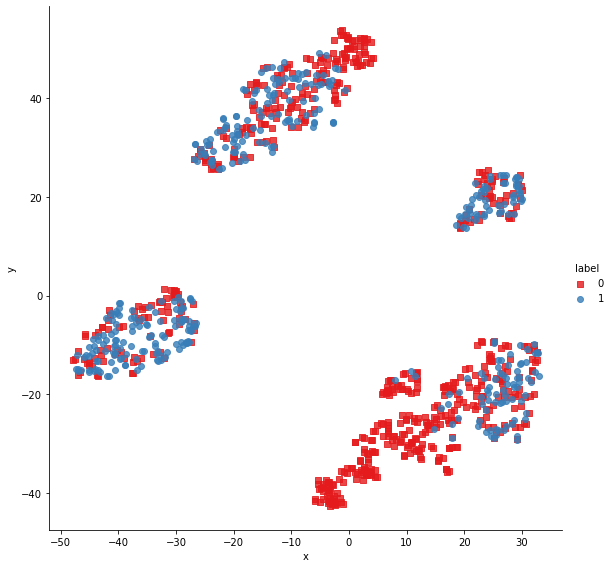

In [33]:
x_df = pd.DataFrame({'x':tsne2d[:,0], 'y':tsne2d[:,1] ,'label':y})

# draw the plot in appropriate place in the grid
sns.lmplot(data=x_df, x='x', y='y', hue='label', fit_reg=False, size=8,palette="Set1",markers=['s','o'])

In [34]:
tsne3d = TSNE(
    n_components=3,
    init='random', # pca
    random_state=101,
    method='barnes_hut',
    n_iter=1000,
    verbose=2,
    angle=0.5
).fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.000s...
[t-SNE] Computed neighbors for 1000 samples in 0.112s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 0.238164
[t-SNE] Computed conditional probabilities in 0.024s
[t-SNE] Iteration 50: error = 59.2614441, gradient norm = 0.1795791 (50 iterations in 2.014s)
[t-SNE] Iteration 100: error = 55.3430138, gradient norm = 0.0909747 (50 iterations in 1.814s)
[t-SNE] Iteration 150: error = 54.7619133, gradient norm = 0.0734766 (50 iterations in 0.727s)
[t-SNE] Iteration 200: error = 54.5219879, gradient norm = 0.0719364 (50 iterations in 0.864s)
[t-SNE] Iteration 250: error = 54.3351746, gradient norm = 0.0763962 (50 iterations in 1.464s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 54.335175
[t-SNE] Iteration 300: error = 0.5773835, gradient norm = 0.0004716 (50 iterations in 0.724s)
[t-SNE] Iteration 350: error = 0.4898408, gradient norm = 0.00018

In [35]:
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.offline as py
py.init_notebook_mode(connected=True)

trace1 = go.Scatter3d(
    x=tsne3d[:,0],
    y=tsne3d[:,1],
    z=tsne3d[:,2],
    mode='markers',
    marker=dict(
        sizemode='diameter',
        color = y,
        colorscale = 'Portland',
        colorbar = dict(title = 'duplicate'),
        line=dict(color='rgb(255, 255, 255)'),
        opacity=0.75
    )
)

data=[trace1]
layout=dict(height=800, width=800, title='3d embedding with engineered features')
fig=dict(data=data, layout=layout)
py.iplot(fig, filename='3DBubble')

# CountVectorizer

In [36]:
#using Bag of words
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(new_df['question1']) + list(new_df['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2) 

Concatnating all columns into single data frame

In [37]:
temp_df1 = pd.DataFrame(q1_arr, index= new_df.index)
temp_df2 = pd.DataFrame(q2_arr, index= new_df.index)
temp_df = pd.concat([temp_df1, temp_df2], axis=1)
temp_df.shape

(1000, 6000)

In [38]:
#concatinate final dataframe with new feature
final_df = pd.concat([new_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(1000, 6028)


,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
398782,398782,496695,532029,what is the best marketing automation tool for...,what is the best marketing automation tool for...,1,75,76,13,13,...,0,0,0,0,0,0,0,0,0,0
115086,115086,187729,187730,i am poor but i want to invest what should i do,i am quite poor and i want to be very rich wh...,0,48,56,13,16,...,0,0,0,0,0,0,0,0,0,0
327711,327711,454161,454162,i am from india and live abroad i met a guy f...,t i e t to thapar university to thapar univers...,0,104,119,28,21,...,0,0,0,0,0,0,0,0,0,0
367788,367788,498109,491396,why do so many people in the u s hate the sou...,my boyfriend doesnt feel guilty when he hurts ...,0,58,145,14,32,...,0,0,0,0,0,0,0,0,0,0
151235,151235,237843,50930,consequences of bhopal gas tragedy,what was the reason behind the bhopal gas tragedy,0,34,49,5,9,...,0,0,0,0,0,0,0,0,0,0


# Data Analysis

In [39]:
print("Question 1 : ")
print("\tMinimum number of characters : ", final_df['q1_len'].min())
print("\tMaximum number of characters : ", final_df['q1_len'].max())
print("\tAverage number of characters : ", final_df['q1_len'].mean())

print("Question 2 : ")
print("\tMinimum number of characters : ", final_df['q2_len'].min())
print("\tMaximum number of characters : ", final_df['q2_len'].max())
print("\tAverage number of characters : ", final_df['q2_len'].mean())

final_df.describe()

Question 1 : 
	Minimum number of characters :  11
	Maximum number of characters :  276
	Average number of characters :  58.661
Question 2 : 
	Minimum number of characters :  12
	Maximum number of characters :  282
	Average number of characters :  60.915


,id,qid1,qid2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.0,1000.000000,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203045.490000,220207.093000,225455.882000,0.379000,58.661000,60.915000,11.576000,12.091000,5.145000,21.975000,...,0.001000,0.001000,0.0,0.001000,0.0,0.001000,0.001000,0.001000,0.001000,0.001000
std,115982.583821,160234.102407,158718.689568,0.485381,30.742986,35.768158,6.241729,7.315342,3.245691,9.384372,...,0.031623,0.031623,0.0,0.031623,0.0,0.031623,0.031623,0.031623,0.031623,0.031623
min,3.000000,7.000000,8.000000,0.000000,11.000000,12.000000,3.000000,3.000000,0.000000,6.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,108405.250000,72198.250000,84206.000000,0.000000,38.000000,38.000000,8.000000,8.000000,3.000000,16.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,200863.000000,194444.000000,203478.000000,0.000000,51.000000,51.000000,10.000000,10.000000,5.000000,20.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,302776.250000,354931.750000,359025.250000,1.000000,69.000000,72.000000,14.000000,14.000000,7.000000,26.000000,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,404239.000000,537892.000000,537748.000000,1.000000,276.000000,282.000000,56.000000,63.000000,22.000000,76.000000,...,1.000000,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


# Intialzing X and Y

In [40]:
#initializing x and y
# train_test_split

x = list(final_df['question1']) + list(final_df['question2'])
y = final_df['is_duplicate']
df1 = pd.DataFrame(final_df.iloc[:,8:13], index = final_df.index)
df2 = pd.DataFrame(q1_arr,index = final_df.index)
df3 = pd.DataFrame(q2_arr, index = final_df.index)
                              
xdf = pd.concat([df3,df2],axis=1)
newxdf = pd.concat([df1,xdf],axis=1)

print(newxdf.isna().sum())
print(newxdf.shape)
print(y.shape)

xtrain, xtest, ytrain, ytest = train_test_split(newxdf,y,test_size = 0.3,random_state = 42)

x=newxdf
xtrain.head()

q1_num_words    0
q2_num_words    0
word_common     0
word_total      0
word_share      0
               ..
2995            0
2996            0
2997            0
2998            0
2999            0
Length: 6005, dtype: int64
(1000, 6005)
(1000,)


,q1_num_words,q2_num_words,word_common,word_total,word_share,0,1,2,3,4,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
135081,17,11,0,24,0.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94116,9,8,7,17,0.41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
392364,16,9,4,22,0.18,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105906,10,6,3,16,0.19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
185804,10,15,10,20,0.50,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Function for Confusion Matrix

In [41]:
#Function for model Evaluation by using Confusion Metrix

def Confusion_Metrix_ME(ytest,y_pred):
    con_mat = metrics.confusion_matrix(ytest, y_pred)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = con_mat, display_labels = [True,False])
    cm_display.plot()
    plt.show()
    print("Accurracy = ", accuracy_score(ytest,y_pred))
    print("Error Rate = ", 1-accuracy_score(ytest,y_pred))
    print("\n\n Classification Report : \n\n ",metrics.classification_report(ytest,y_pred))
    print("\n\n F1 - Score : ", f1_score(ytest,y_pred)) 
    print("\n Sensitivity : ",con_mat[0,0]/(con_mat[0,0]+con_mat[1,0]))   #Sensitivity (true positive rate)
    print("\n Specificity : ",con_mat[1,1]/(con_mat[1,1]+con_mat[0,1]))   #Specificity (true negative rate)
    

# Function for ROC Curve

In [42]:
def ROC_Curve(ytest, y_pred):
    #ROC curve is a plot of true positive rate (recall) against false positive rate (TN / (TN+FP)). AUC-ROC stands for Area Under the Receiver Operating Characteristics and the higher the area, the better the model performance. 
    #If the curve is somewhere near the 50% diagonal line, it suggests that the model randomly predicts the output variable
    print("ROC AUC Curve score : ",metrics.roc_auc_score(ytest,y_pred))
    fpr,tpr, a = metrics.roc_curve(ytest,y_pred)
    
    #ploting the ROC curve
    plt.plot(fpr,tpr)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


In [43]:
model_list = list()
model_train_accuracy = list()
model_test_accuracy = list()

## KNN Model

In [44]:
def KNNClassifier(x, y):
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.3,random_state = 42)
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(xtrain, ytrain)
    train_y_pred = knn.predict(xtrain)
    tscore = accuracy_score(ytrain,train_y_pred)
    y_pred = knn.predict(xtest)
    score = accuracy_score(ytest,y_pred)
    Confusion_Metrix_ME(ytest,y_pred)
    ROC_Curve(ytest,y_pred)
    return score,tscore

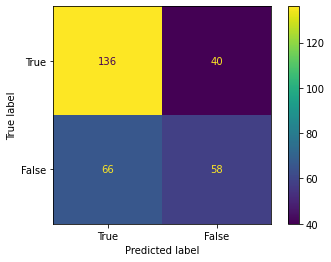

Accurracy =  0.6466666666666666
Error Rate =  0.3533333333333334


 Classification Report : 

                precision    recall  f1-score   support

           0       0.67      0.77      0.72       176
           1       0.59      0.47      0.52       124

    accuracy                           0.65       300
   macro avg       0.63      0.62      0.62       300
weighted avg       0.64      0.65      0.64       300



 F1 - Score :  0.5225225225225224

 Sensitivity :  0.6732673267326733

 Specificity :  0.5918367346938775
ROC AUC Curve score :  0.6202346041055719


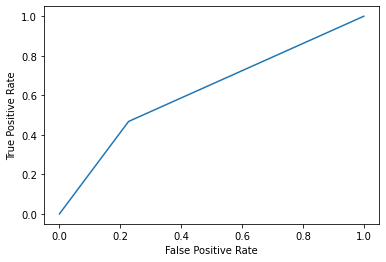

KNN training Score :  0.7771428571428571
KNN Testing Score :  0.6466666666666666


In [45]:
model_list.append("knn")
test_accuracy,train_accuracy = KNNClassifier(x,y)
model_train_accuracy.append(train_accuracy)
model_test_accuracy.append(test_accuracy)
print("KNN training Score : ", train_accuracy)
print("KNN Testing Score : ", test_accuracy)

# Bernoulli Naive Bayes

In [46]:
def BerNaiveBayes(x, y):
    xtrain, xtest, ytrain, ytest = train_test_split(newxdf,y,test_size = 0.3,random_state = 42)
    nb = BernoulliNB(binarize = 0.0)
    nb.fit(xtrain,ytrain)
    train_y_pred = nb.predict(xtrain)
    tscore = accuracy_score(ytrain,train_y_pred)
    y_pred = nb.predict(xtest)
    score = accuracy_score(ytest,y_pred)
    Confusion_Metrix_ME(ytest,y_pred)
    ROC_Curve(ytest,y_pred)
    return score,tscore

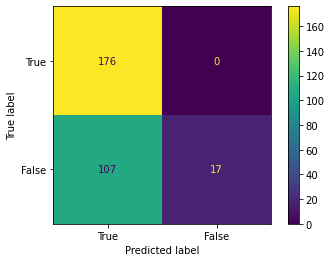

Accurracy =  0.6433333333333333
Error Rate =  0.3566666666666667


 Classification Report : 

                precision    recall  f1-score   support

           0       0.62      1.00      0.77       176
           1       1.00      0.14      0.24       124

    accuracy                           0.64       300
   macro avg       0.81      0.57      0.50       300
weighted avg       0.78      0.64      0.55       300



 F1 - Score :  0.2411347517730496

 Sensitivity :  0.6219081272084805

 Specificity :  1.0
ROC AUC Curve score :  0.5685483870967742


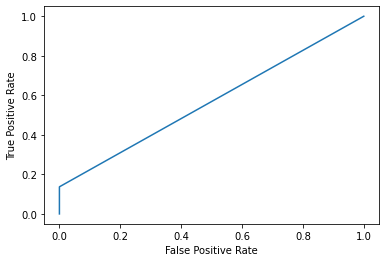

Bernoulli Naive Bayes training Score :  0.8
Bernoulli Naive bayes Testing Score :  0.6433333333333333


In [47]:
model_list.append("Ber_NB")
test_accuracy, train_accuracy = BerNaiveBayes(x,y)
model_train_accuracy.append(train_accuracy)
model_test_accuracy.append(test_accuracy)
print("Bernoulli Naive Bayes training Score : ", train_accuracy)
print("Bernoulli Naive bayes Testing Score : ", test_accuracy)

## Guassion Naive Bayes

In [48]:
def GaussionNaiveB(x, y):
    xtrain, xtest, ytrain, ytest = train_test_split(newxdf,y,test_size = 0.3,random_state = 42)
    gnb = GaussianNB()
    gnb.fit(xtrain, ytrain)
    train_y_pred = gnb.predict(xtrain)
    tscore = accuracy_score(ytrain,train_y_pred)
    y_pred = gnb.predict(xtest)
    score = accuracy_score(ytest,y_pred)
    Confusion_Metrix_ME(ytest,y_pred)
    ROC_Curve(ytest,y_pred)
    return score,tscore

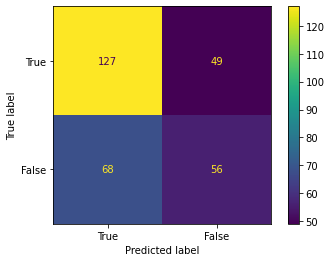

Accurracy =  0.61
Error Rate =  0.39


 Classification Report : 

                precision    recall  f1-score   support

           0       0.65      0.72      0.68       176
           1       0.53      0.45      0.49       124

    accuracy                           0.61       300
   macro avg       0.59      0.59      0.59       300
weighted avg       0.60      0.61      0.60       300



 F1 - Score :  0.48908296943231444

 Sensitivity :  0.6512820512820513

 Specificity :  0.5333333333333333
ROC AUC Curve score :  0.5866019061583578


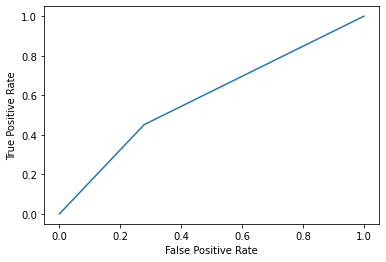

Gaussion Naive Bayes training Score :  0.9842857142857143
Gaussion Naive bayes Testing Score :  0.61


In [49]:
model_list.append("Gau_NB")
test_accuracy,train_accuracy = GaussionNaiveB(x,y)
model_train_accuracy.append(train_accuracy)
model_test_accuracy.append(test_accuracy)
print("Gaussion Naive Bayes training Score : ", train_accuracy)
print("Gaussion Naive bayes Testing Score : ", test_accuracy)

## Multinomial Naive Bayes

In [50]:
def MultinomialNaiveB(x, y):
    xtrain, xtest, ytrain, ytest = train_test_split(newxdf,y,test_size = 0.3,random_state = 42)
    mnb = MultinomialNB()
    mnb.fit(xtrain, ytrain)
    train_y_pred = mnb.predict(xtrain)
    tscore = accuracy_score(ytrain,train_y_pred)
    y_pred = mnb.predict(xtest)
    score = accuracy_score(ytest,y_pred)
    Confusion_Metrix_ME(ytest,y_pred)
    ROC_Curve(ytest,y_pred)
    return score,tscore

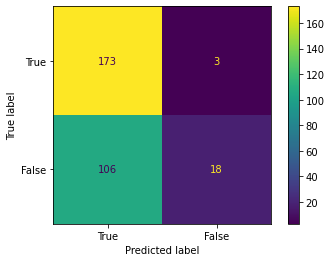

Accurracy =  0.6366666666666667
Error Rate =  0.3633333333333333


 Classification Report : 

                precision    recall  f1-score   support

           0       0.62      0.98      0.76       176
           1       0.86      0.15      0.25       124

    accuracy                           0.64       300
   macro avg       0.74      0.56      0.50       300
weighted avg       0.72      0.64      0.55       300



 F1 - Score :  0.24827586206896554

 Sensitivity :  0.6200716845878136

 Specificity :  0.8571428571428571
ROC AUC Curve score :  0.5640579178885631


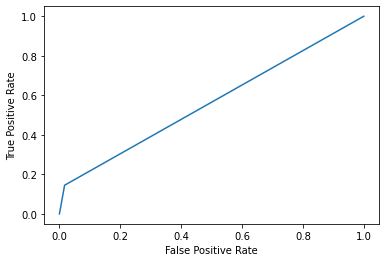

Multinomial Naive Bayes training Score :  0.87
Multinomial Naive bayes Testing Score :  0.6366666666666667


In [51]:
model_list.append("Multi_NB")
test_accuracy, train_accuracy= MultinomialNaiveB(x,y)
model_train_accuracy.append(train_accuracy)
model_test_accuracy.append(test_accuracy)
print("Multinomial Naive Bayes training Score : ", train_accuracy)
print("Multinomial Naive bayes Testing Score : ", test_accuracy)

# Support Vector Machine Model

In [52]:
def SupportVM(x, y):
    xtrain, xtest, ytrain, ytest = train_test_split(newxdf,y,test_size = 0.3,random_state = 42)
    svc = SVC()
    svc.fit(xtrain, ytrain)
    train_y_pred = svc.predict(xtrain)
    tscore = accuracy_score(ytrain,train_y_pred)
    y_pred = svc.predict(xtest)
    score = accuracy_score(ytest,y_pred)
    Confusion_Metrix_ME(ytest,y_pred)
    ROC_Curve(ytest,y_pred)
    return score,tscore

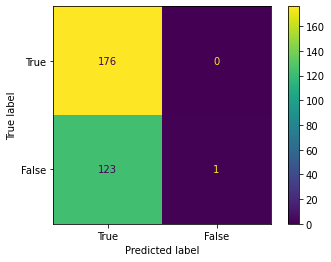

Accurracy =  0.59
Error Rate =  0.41000000000000003


 Classification Report : 

                precision    recall  f1-score   support

           0       0.59      1.00      0.74       176
           1       1.00      0.01      0.02       124

    accuracy                           0.59       300
   macro avg       0.79      0.50      0.38       300
weighted avg       0.76      0.59      0.44       300



 F1 - Score :  0.016

 Sensitivity :  0.5886287625418061

 Specificity :  1.0
ROC AUC Curve score :  0.5040322580645161


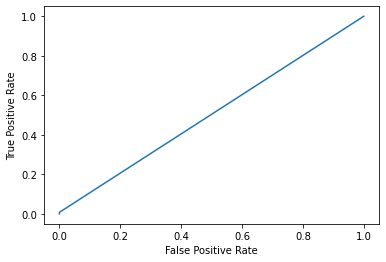

SVM training Score :  0.59
SVM Testing Score :  0.6371428571428571


In [53]:
model_list.append("SVM")
train_accuracy,test_accuracy= SupportVM(x,y)
model_train_accuracy.append(train_accuracy)
model_test_accuracy.append(test_accuracy)
print("SVM training Score : ", train_accuracy)
print("SVM Testing Score : ", test_accuracy)

# Random Forest

In [54]:
rf = RandomForestClassifier()
def RandomForest(x, y):
    xtrain, xtest, ytrain, ytest = train_test_split(newxdf,y,test_size = 0.3,random_state = 42)
    rf.fit(xtrain,ytrain)
    train_y_pred = rf.predict(xtrain)
    tscore = accuracy_score(ytrain,train_y_pred)
    y_pred = rf.predict(xtest)
    score = accuracy_score(ytest,y_pred)
    Confusion_Metrix_ME(ytest,y_pred)
    ROC_Curve(ytest,y_pred)
    return score,tscore

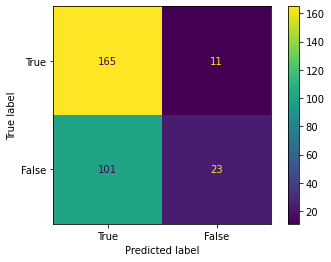

Accurracy =  0.6266666666666667
Error Rate =  0.3733333333333333


 Classification Report : 

                precision    recall  f1-score   support

           0       0.62      0.94      0.75       176
           1       0.68      0.19      0.29       124

    accuracy                           0.63       300
   macro avg       0.65      0.56      0.52       300
weighted avg       0.64      0.63      0.56       300



 F1 - Score :  0.2911392405063291

 Sensitivity :  0.6203007518796992

 Specificity :  0.6764705882352942
ROC AUC Curve score :  0.5614919354838709


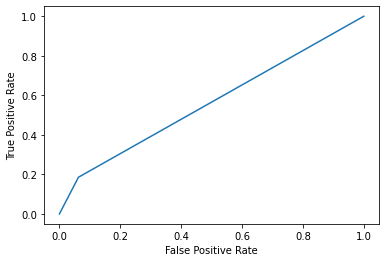

Random Forest training Score :  1.0
Random Forest Testing Score :  0.6266666666666667


In [55]:
model_list.append("RandomForest")
test_accuracy, train_accuracy= RandomForest(x,y)
model_train_accuracy.append(train_accuracy)
model_test_accuracy.append(test_accuracy)
print("Random Forest training Score : ", train_accuracy)
print("Random Forest Testing Score : ", test_accuracy)

# Model Comparision

In [56]:
print(model_list,model_train_accuracy,model_test_accuracy)

['knn', 'Ber_NB', 'Gau_NB', 'Multi_NB', 'SVM', 'RandomForest'] [0.7771428571428571, 0.8, 0.9842857142857143, 0.87, 0.59, 1.0] [0.6466666666666666, 0.6433333333333333, 0.61, 0.6366666666666667, 0.6371428571428571, 0.6266666666666667]


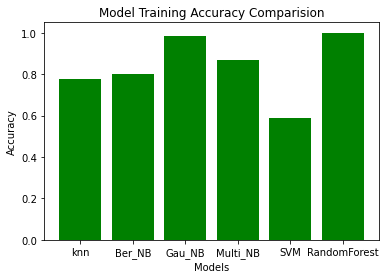

In [57]:
plt.bar(model_list,model_train_accuracy,  color = 'g')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Training Accuracy Comparision")
plt.show()


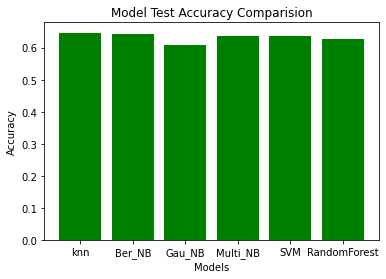

In [58]:
plt.bar(model_list,model_test_accuracy,  color = 'g')
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Test Accuracy Comparision")
plt.show()

# Cross Validation

In [59]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(RandomForestClassifier(),X,y,cv=10,scoring='accuracy'))

0.681

In [60]:
'''''bias - Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model.
It always leads to high error on training and test data.

variance - variance is the variability of model prediction for a given data point or a value which tells us spread of our data. 
Model with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. 
As a result, such models perform very well on training data but has high error rates on test data. 

underfiting - low traing and testing accuracy 

Overfitti - high traing and low testing

pipeline
corss validation
'''

"''bias - Bias is the difference between the average prediction of our model and the correct value which we are trying to predict. Model with high bias pays very little attention to the training data and oversimplifies the model.\nIt always leads to high error on training and test data.\n\nvariance - variance is the variability of model prediction for a given data point or a value which tells us spread of our data. \nModel with high variance pays a lot of attention to training data and does not generalize on the data which it hasn’t seen before. \nAs a result, such models perform very well on training data but has high error rates on test data. \n\nunderfiting - low traing and testing accuracy \n\nOverfitti - high traing and low testing\n\npipeline\ncorss validation\n"

# Testing Data

In [61]:
testdf = pd.read_csv("test.csv")
testdf.head()
testdf.shape

(20, 6)

In [62]:
#preprocessing
testdf['question1']= testdf['question1'].apply(preprocess)
testdf['question2']= testdf['question2'].apply(preprocess)

In [63]:
#Feature Engineering
testdf['q1_len'] = testdf['question1'].str.len() 
testdf['q2_len'] = testdf['question2'].str.len()

In [64]:
# adding another two features q1_num_words and q2_num_words
testdf['q1_num_words'] = testdf['question1'].apply(lambda row:len(row.split(" "))) 
testdf['q2_num_words'] = testdf['question2'].apply(lambda row:len(row.split(" "))) 

In [65]:
#Commen Words
testdf['word_common'] = testdf.apply(common_words, axis=1)

In [66]:
#Total Words
testdf['word_total'] = testdf.apply(total_words, axis=1)

In [67]:
#Words Share
testdf['word_share'] = round(testdf['word_common']/testdf['word_total'],2)
testdf.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
0,0,1,2,how does the surface pro himself 4 compare wit...,why did microsoft choose core m3 and not core ...,0,56,67,11,14,3,23,0.13
1,1,3,4,should i have a hair transplant at age 24 how...,how much cost does hair transplant require,0,65,42,15,7,5,22,0.23
2,2,5,6,what but is the best way to send money from ch...,what you send money to china,0,59,28,14,6,5,18,0.28
3,3,7,8,which food not emulsifiers,what foods fibre,0,26,16,4,3,0,7,0.00
4,4,9,10,how aberystwyth start reading,how their can i start reading,0,31,29,6,6,3,11,0.27


In [68]:
token_features = testdf.apply(fetch_token_features, axis=1)

testdf["cwc_min"]       = list(map(lambda x: x[0], token_features))
testdf["cwc_max"]       = list(map(lambda x: x[1], token_features))
testdf["csc_min"]       = list(map(lambda x: x[2], token_features))
testdf["csc_max"]       = list(map(lambda x: x[3], token_features))
testdf["ctc_min"]       = list(map(lambda x: x[4], token_features))
testdf["ctc_max"]       = list(map(lambda x: x[5], token_features))
testdf["last_word_eq"]  = list(map(lambda x: x[6], token_features))
testdf["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [69]:
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [70]:
fuzzy_features = testdf.apply(fetch_fuzzy_features, axis=1)

# Creating new feature columns for fuzzy features
testdf['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
testdf['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
testdf['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
testdf['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [71]:
testdf.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
0,0,1,2,how does the surface pro himself 4 compare wit...,why did microsoft choose core m3 and not core ...,0,56,67,11,14,...,0.000000,0.000000,0.272725,0.214284,0,0,37,44,50,54
1,1,3,4,should i have a hair transplant at age 24 how...,how much cost does hair transplant require,0,65,42,15,7,...,0.499975,0.142855,0.714276,0.357140,0,0,47,55,58,82
2,2,5,6,what but is the best way to send money from ch...,what you send money to china,0,59,28,14,6,...,0.666644,0.333328,0.833319,0.357140,0,1,57,82,55,92
3,3,7,8,which food not emulsifiers,what foods fibre,0,26,16,4,3,...,0.000000,0.000000,0.000000,0.000000,0,0,52,56,52,52
4,4,9,10,how aberystwyth start reading,how their can i start reading,0,31,29,6,6,...,0.999900,0.249994,0.749981,0.499992,1,1,70,72,66,74


In [72]:
#Count vecterization
from sklearn.feature_extraction.text import CountVectorizer
test_questions = list(testdf['question1']) + list(testdf['question2'])

cv = CountVectorizer(max_features=3000)
q1_arr, q2_arr = np.vsplit(cv.fit_transform(test_questions).toarray(),2)
y = testdf['is_duplicate']
df1 = pd.DataFrame(testdf.iloc[:,8:], index = testdf.index)
df2 = pd.DataFrame(q1_arr,index = testdf.index)
df3 = pd.DataFrame(q2_arr, index = testdf.index)

xdf = pd.concat([df3,df2],axis=1)
newxdf = pd.concat([df1,xdf],axis=1)

print(newxdf.isna().sum())
newxdf.fillna(0)
print(newxdf.shape)
print(y.shape)
xtrain, xtest, ytrain, ytest = train_test_split(newxdf,y,test_size = 0.3,random_state = 42)

x=newxdf
print(x.shape)

q1_num_words    0
q2_num_words    0
word_common     0
word_total      0
word_share      0
               ..
209             0
210             0
211             0
212             0
213             0
Length: 445, dtype: int64
(20, 445)
(20,)
(20, 445)


# Random Forest Classifier predicted values for unseen data

In [73]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)
y_pred = rf.predict(x)
score = accuracy_score(y,y_pred)

print("Actual Values:    ",list(y))
print("Predicted Values: ",list(y_pred))
print("Accuracy Score ", score)

Actual Values:     [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0]
Predicted Values:  [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Accuracy Score  0.95
